In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
from configs import *
from tqdm import tqdm
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from time import time
tqdm.monitor_interval = 0
import torch
import json
import torch.nn as nn
import numpy as np
torch.manual_seed(0)
np.random.seed(0)

In [24]:
LAG = 12
SIND = 30
STOPS = 5
SROUTE = 'M102_0'

data = history_byname(SROUTE)
print(data.shape)

(13248, 59)


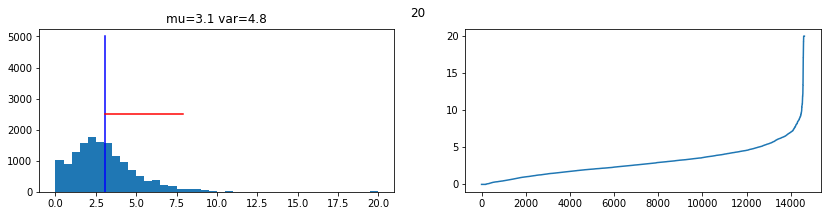

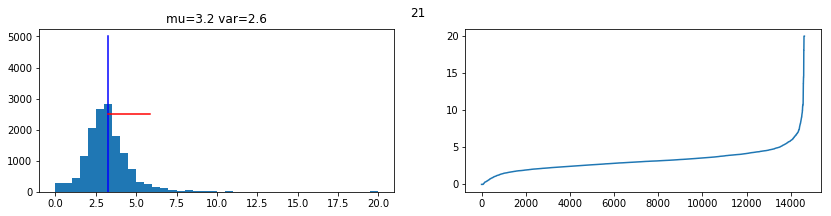

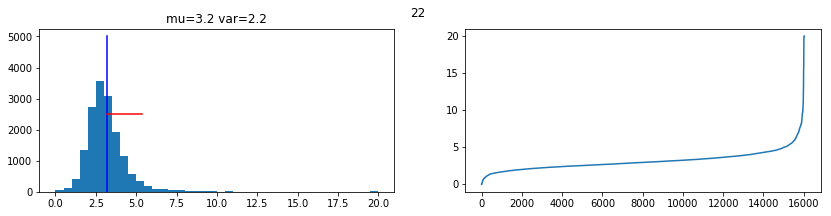

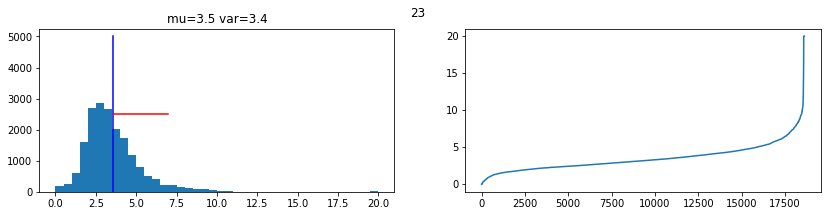

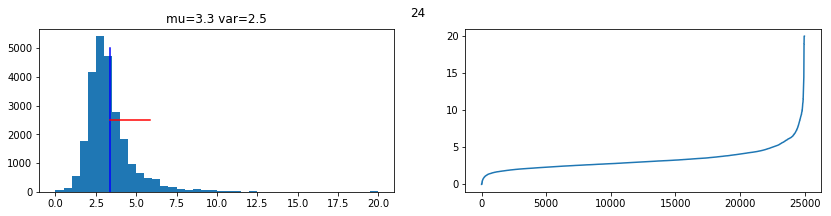

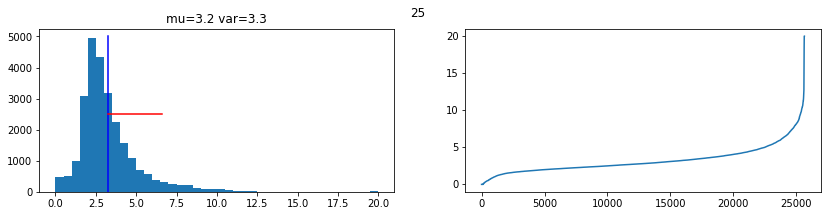

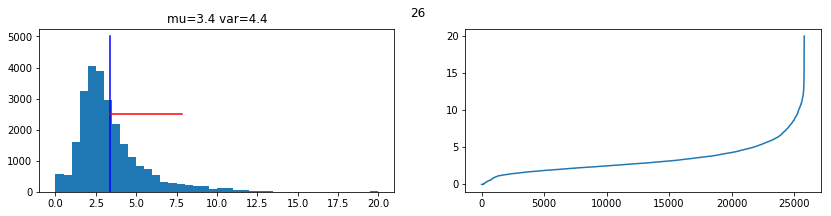

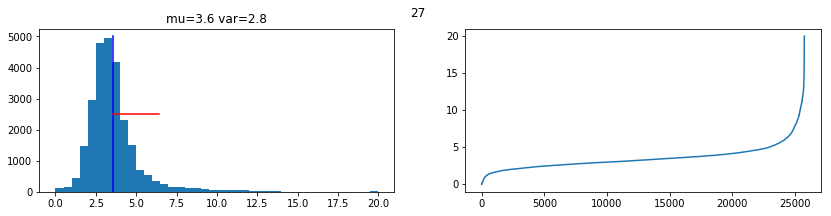

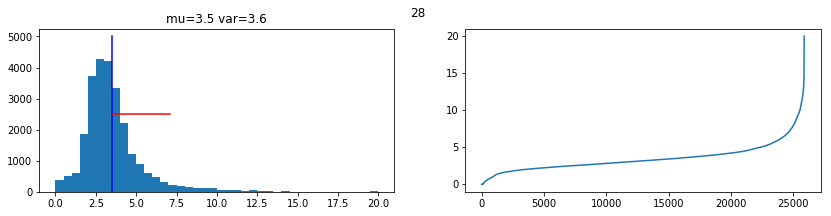

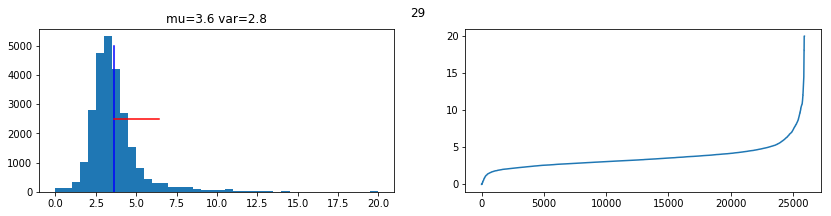

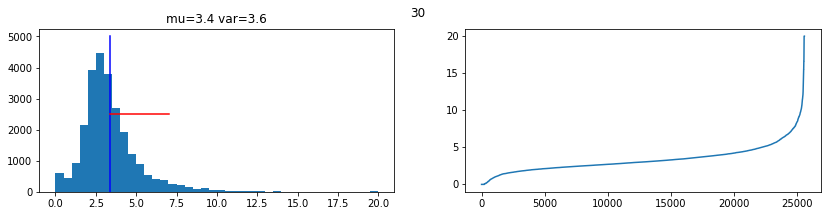

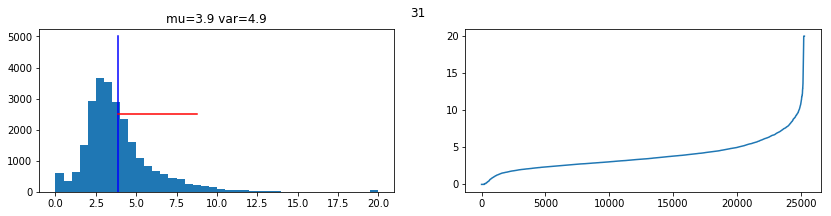

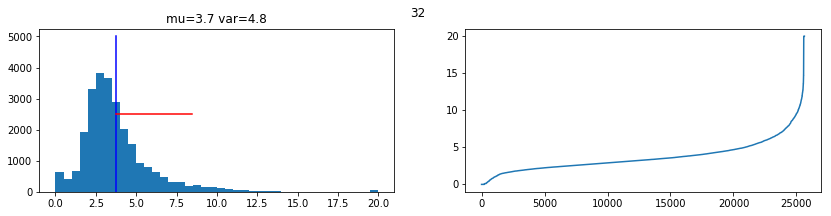

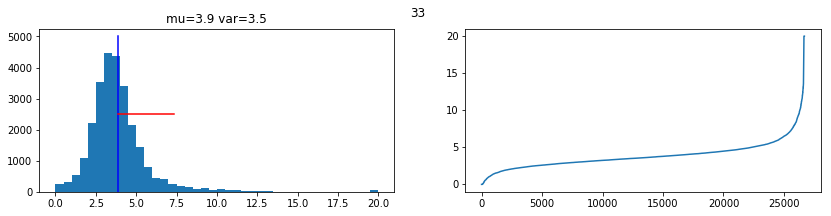

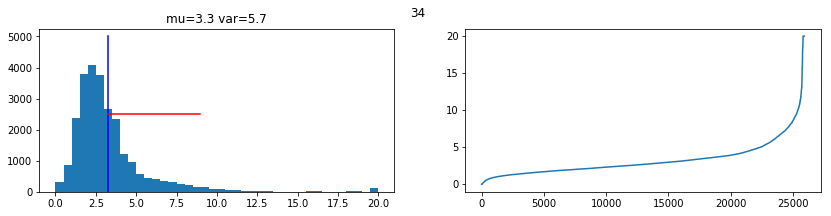

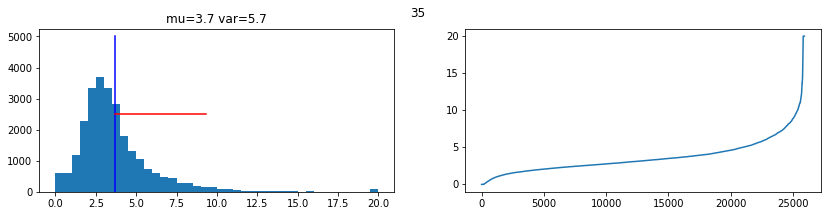

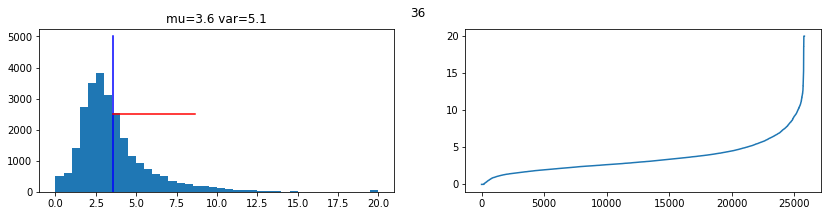

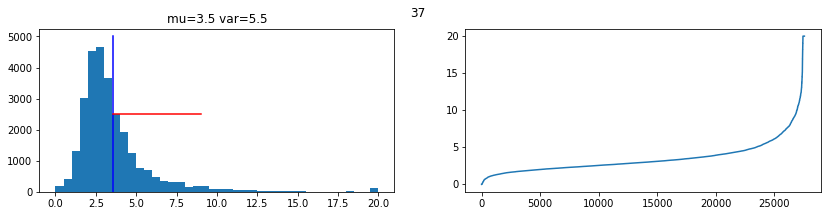

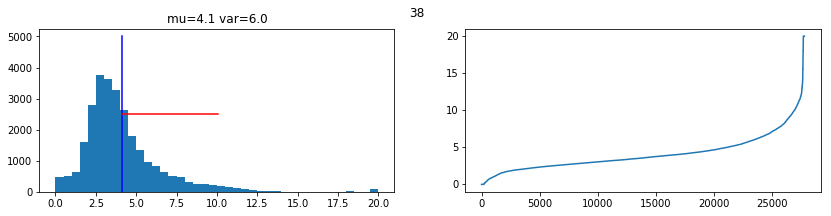

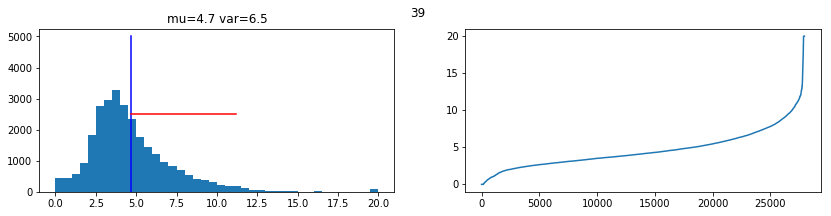

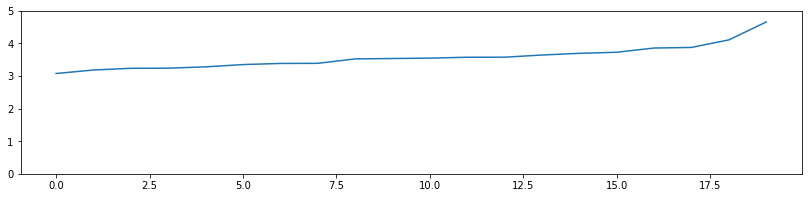

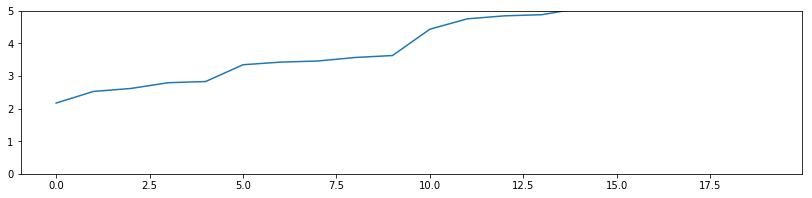

In [25]:
stats = []
for sind in range(20, 40):
    distdata = SingleStop(
        SROUTE, sind, 'train', 1, norm=10,
        lag=12, stops=1, verbose=False)

    speeds = []
#     print(distdata.norm)
    for hist in distdata:
        speeds += hist.reshape(12 * 1).tolist()

    speeds = np.array(speeds)
    speeds *= 10
    plt.figure(figsize=(14, 3))
    plt.suptitle(sind)
    mu = np.mean(speeds)
    var = np.var(speeds)
    stats.append((mu, var))
    plt.subplot(1, 2, 1)
    plt.gca().set_title('mu=%.1f var=%.1f' % (mu, var))
    plt.hist(sorted(speeds), bins=40)
    plt.plot([mu, mu], [0, 5000], color='blue')
    plt.plot([mu, mu + var], [2500, 2500], color='red')
    
    plt.subplot(1, 2, 2)
    plt.plot(sorted(speeds))
    
    plt.show(); plt.close()    
#     break
mus, vars = zip(*stats)
plt.figure(figsize=(14, 3))
plt.plot(sorted(mus))
plt.ylim(0, 5)
plt.show(); plt.close()

plt.figure(figsize=(14, 3))
plt.plot(sorted(vars))
plt.ylim(0, 5)
plt.show(); plt.close()
    


* Few speeds are blow 1
* Speeds are concentrated around < 5. There is no clear "jam" speed